In [14]:
import random
import json
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import os
import shutil

In [16]:
with open('data4.json', 'r') as openfile:
 
    # Reading from json file
    json_object = json.load(openfile)

json_object.keys()

dict_keys(['I', 'J', 'field', 'a', 'b', 'state', 'construct', 'time'])

In [17]:
# Создаем цветовую карту с яркими цветами
color_map = {
    'A': (1.0, 0.647, 0.0),   # Оранжевый для 'A'
    'B': (0.5, 0.0, 0.5),     # Фиолетовый для 'B'
    '0': (1.0, 1.0, 0.0),     # Желтый для '0'
    '1': (0.0, 0.0, 1.0)      # Синий для '1'
}

shenon_timelapse = []
opinion_timelapse = []

In [18]:
def field_generation(I, J, a = 0, b = 0):
    field = []
    for i in range (I):
        stroka = []
        for j in range (J):
            number = random.randint(0, 1)
            stroka.append(number)
        field.append(stroka)
    while a != 0:
        number_x = random.randint(0, i)
        number_y = random.randint(0, j)
        if field[number_x][number_y] == "A":
            pass
        else:
            field[number_x][number_y] = "A"
            a = a - 1
    while b != 0:
        number_x = random.randint(0, i)
        number_y = random.randint(0, j)
        if field[number_x][number_y] == "B":
            pass
        else:
            field[number_x][number_y] = "B"
            b = b - 1 
    return(field)

In [19]:
def data_from_json(json_object):
    I = json_object.get('I')
    J = json_object.get('J')
    #print(json_object.keys())
    field = json_object.get('field')
    a = json_object.get('a')
    b = json_object.get('b')
    if field == 0:
        field = field_generation(I, J, a, b)
    state = json_object.get('state')
    construct = json_object.get('construct')
    time = json_object.get('time')
    return I, J, field, state, construct, time

In [20]:
def count_opinions(opinions):
    opinions_count = [0, 0]
    for i in range (len(opinions)):
        if (opinions[i] == 0):
            opinions_count[0] += 1
        else:
            opinions_count[1] += 1
    return opinions_count

In [21]:
def shenon_entropy(x):
    elements = np.unique(x)
    k = len(np.unique(x))
    curr_element_number = 0
    res = 0
    for element in elements:
        for i in range(len(x)):
            if (x[i] == element):
                curr_element_number += 1
        res += -curr_element_number/len(x) * np.log2(curr_element_number/len(x))
        curr_element_number = 0
    return res

In [22]:
class Agent:
    def __init__(self, state, opinion, position):
        self.state = state
        self.opinion = opinion
        self.position = position
        self.database = []
    def update(self):
        self.database.append(self.opinion)
    def opinion_decider(self, field, construct):
        if self.state == "psycho":
            self.opinion = self.opinion
        elif self.state == "conf" or self.state == "nonconf":
            if construct == "PLUS":
                i_pos = self.position[0]
                j_pos = self.position[1]
                i_plus1 = (self.position[0] + 1) % I
                i_minus1 = (self.position[0] - 1) % I
                j_plus1 = (self.position[1] + 1) % J
                j_minus1 = (self.position[1] - 1) % J
                neigh_opinions = []
                neigh_opinions.append(field[i_plus1][j_pos])
                neigh_opinions.append(field[i_minus1][j_pos])
                neigh_opinions.append(field[i_pos][j_plus1])
                neigh_opinions.append(field[i_pos][j_minus1])
                op_sum = count_opinions(neigh_opinions)
                if (self.opinion == 0):
                    decide_num = random.randint(0, 4)
                    if (decide_num >= op_sum[1]):
                        if self.state == "conf":
                            self.opinion = self.opinion
                        else:
                            self.opinion = 1
                    else:
                        if self.state == "conf":
                            self.opinion = 1
                        else:
                            self.opinion = self.opinion
                else:
                    decide_num = random.randint(0, 4)
                    if (decide_num >= op_sum[0]):
                        if self.state == "conf":
                            self.opinion = self.opinion
                        else:
                            self.opinion = 0
                    else:
                        if self.state == "conf":
                            self.opinion = 0
                        else:
                            self.opinion = self.opinion
                            
            elif construct == "CIRCLE":
                i_pos = self.position[0]
                j_pos = self.position[1]
                i_plus1 = (self.position[0] + 1) % I
                i_minus1 = (self.position[0] - 1) % I
                j_plus1 = (self.position[1] + 1) % J
                j_minus1 = (self.position[1] - 1) % J
                neigh_opinions = []
                neigh_opinions.append(field[i_plus1][j_pos])
                neigh_opinions.append(field[i_minus1][j_pos])
                neigh_opinions.append(field[i_pos][j_plus1])
                neigh_opinions.append(field[i_pos][j_minus1])
                neigh_opinions.append(field[i_plus1][j_plus1])
                neigh_opinions.append(field[i_plus1][j_minus1])
                neigh_opinions.append(field[i_minus1][j_plus1])
                neigh_opinions.append(field[i_minus1][j_minus1])
                op_sum = count_opinions(neigh_opinions)
                #print(op_sum)
                if (self.opinion == 0):
                    decide_num = random.randint(0, 8)
                    if (decide_num >= op_sum[1]):
                        if self.state == "conf":
                            self.opinion = self.opinion
                        else:
                            self.opinion = 1
                    else:
                        if self.state == "conf":
                            self.opinion = 1
                        else:
                            self.opinion = self.opinion
                else:
                    decide_num = random.randint(0, 8)
                    if (decide_num >= op_sum[0]):
                        if self.state == "conf":
                            self.opinion = self.opinion
                        else:
                            self.opinion = 0
                    else:
                        if self.state == "conf":
                            self.opinion = 0
                        else:
                            self.opinion = self.opinion

            if construct == "GRAPH":
                impact_num_i = random.randint(0, I)
                impact_num_j = random.randint(0, J)
                if (self.position[0] == impact_num_i and self.position[1] == impact_num_j):
                    while (self.position[0] == impact_num_i and self.position[1] == impact_num_j):
                        num = random.randint(0,1)
                        if num == 0:
                            impact_num_i = random.randint(0, I)
                        else:
                            impact_num_j = random.randint(0, J)
                decide_number = random.randint(0,1)
                if (decide_number == 1):
                    if self.state == "conf":
                        self.opinion = field[impact_num_i - 1][impact_num_j - 1]
                    else:
                        self.opinion = self.opinion
                else:
                    if self.state == "conf":
                        self.opinion = self.opinion
                    else:
                        self.opinion = field[impact_num_i - 1][impact_num_j - 1]

In [23]:
def agents_init(field, state):
    agents = []
    for i in range(I):
        for j in range(J):
            value = field[i][j]
            if value == 0:
                agent = Agent(state=state, opinion=0, position=(i, j))
                agent.update()
                agents.append(agent)
            elif value == 1:
                agent = Agent(state=state, opinion=1, position=(i, j))
                agent.update()
                agents.append(agent)
            elif value == 'A':
                agent = Agent(state='psycho', opinion=0, position=(i, j))
                agent.update()
                agents.append(agent)
            elif value == 'B':
                agent = Agent(state='psycho', opinion=1, position=(i, j))
                agent.update()
                agents.append(agent)
    return agents

In [24]:
def field_from_agents(agents, psycho = False):
    old_field = []
    old_field_line = []
    j = 0
    for agent in agents:
        j += 1
        old_field_line.append(agent.opinion)
        if j == J:
            old_field.append(old_field_line)
            old_field_line = []
            j = 0
    if psycho == True:
        for agent in agents:
            if agent.state == "psycho":
                x = agent.position[0]
                y = agent.position[1]
                if (agent.opinion == 0):
                    old_field[x][y] = "A"
                else:
                    old_field[x][y] = "B"
    return old_field

In [25]:
def opinion_presentage(agents):
    tmp_len = I * J
    amount = 0
    for agent in agents:
        if agent.opinion == 0:
            amount += 1
    return (amount/tmp_len)

In [52]:
def show_map(agents, frames):
    array_data = np.array(field_from_agents(agents, psycho = True))
    colored_array = np.zeros((array_data.shape[0], array_data.shape[1], 3))

    for i in range(array_data.shape[0]):
        for j in range(array_data.shape[1]):
            value = array_data[i][j]
            if value == 'A':
                colored_array[i][j] = color_map['A']
            elif value == 'B':
                colored_array[i][j] = color_map['B']
            elif str(value) == '0':
                colored_array[i][j] = color_map['0']
            elif str(value) == '1':
                colored_array[i][j] = color_map['1']

    #plt.imshow(colored_array)
    #plt.axis('off') # Отключаем оси
    #plt.show()

    frames.append(colored_array)

In [53]:
def show_shenon_map(agents, shenon_frames):
    shenon_field = np.zeros((I, J))
    for agent in agents:
        i, j = agent.position
        shenon_field[i][j] = shenon_entropy(agent.database)
    
    cmap = plt.get_cmap('viridis')
    colored_shenon_field = cmap(shenon_field)

    shenon_frames.append(colored_shenon_field)

In [54]:
def agents_field_iteration(agents, construct, visualisation = True):
    old_field = field_from_agents(agents)
    for agent in agents:
        agent.opinion_decider(old_field, construct)
        agent.update()
    return(agents)

In [55]:
def delete_everything_in_folder(folder_path):
    if not os.path.exists(folder_path):
        print(f"Папка {folder_path} не существует.")
        return

    if os.listdir(folder_path):
        print(f"Папка {folder_path} не пуста. Удаляем содержимое.")
        shutil.rmtree(folder_path)
        os.mkdir(folder_path)
    else:
        print(f"Папка {folder_path} уже пуста. Ничего не удалено.")

In [56]:
def population_opinion_timelapse(time, agents, construct):
    frames = []
    shenon_frames = []
    
    show_map(agents, frames)
    show_shenon_map(agents, shenon_frames)
    
    opinion_presentage_array = []
    opinion_presentage_array.append(opinion_presentage(agents))
    opinion_timelapse.append(field_from_agents(agents, psycho = True))
    
    for i in range(time):
        shenon_base = []
        new_agents = agents_field_iteration(agents, construct)
        database_for_update = []
        for agent in agents:
            database_for_update.append(agent.database)
        for agent in new_agents:
            agent.database = database_for_update.pop(0)
        agents = new_agents
        
        show_map(agents, frames)
        show_shenon_map(agents, shenon_frames)
        
        opinion_presentage_array.append(opinion_presentage(agents))
        opinion_timelapse.append(field_from_agents(agents, psycho = True))
        #for agent in agents:
        #    shenon_base.append(shenon_entropy(agent.database))
        #shenon_timelapse.append(shenon_base)

    time_tmp = list(range(0, time + 1))
    plt.figure(figsize=(10, 5))
    plt.plot(time_tmp, opinion_presentage_array, label='Процент мнения А', color='blue')  
    plt.title('График значений от времени')
    plt.xlabel('Время')  # Подпись оси X
    plt.ylabel('Значения')  # Подпись оси Y
    plt.ylim(0, 1)  # Ограничение по оси Y от 0 до 1
    plt.grid()
    plt.legend()
    #plt.show()
    plt.savefig('results/opinion_presentage.png')

    fig, ax = plt.subplots()
    ims = []
    for frame in frames:
        im = ax.imshow(frame, animated=True)
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True, repeat_delay=1000)
    ani.save('results/opinion.gif', writer='ffmpeg')

    fig2, ax2 = plt.subplots()
    ims2 = []
    for shenon_frame in shenon_frames:
        im2 = ax2.imshow(shenon_frame, animated=True)
        ims2.append([im2])

    ani2 = animation.ArtistAnimation(fig2, ims2, interval=100, blit=True, repeat_delay=1000)
    ani2.save('results/shenon.gif', writer='ffmpeg')
    
    return agents

In [57]:
delete_everything_in_folder('bioinf_game/results')
random.seed = 42
I, J, field, state, construct, time = data_from_json(json_object)
print(I, J, field, state, construct, time)

Папка bioinf_game/results не существует.
20 20 [[1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0], [0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1], [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0], [1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1], [0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1], [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1], [0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0], [0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1], [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1], [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0], [1, 0, 1, 0, 1, 1, 0, 

MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


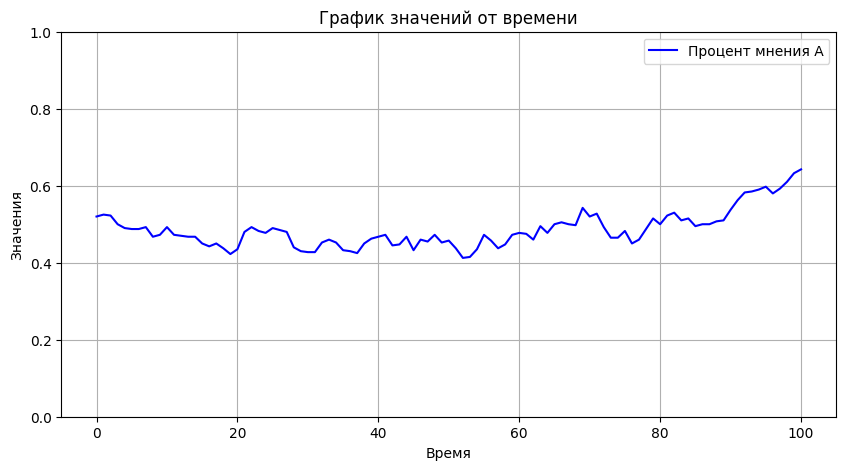

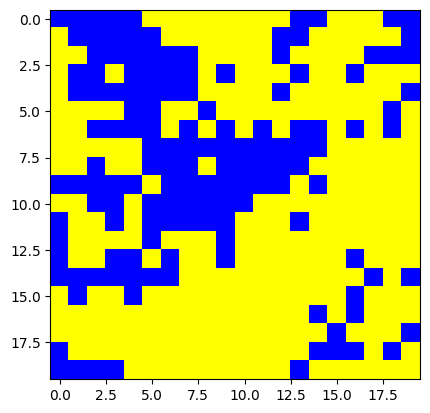

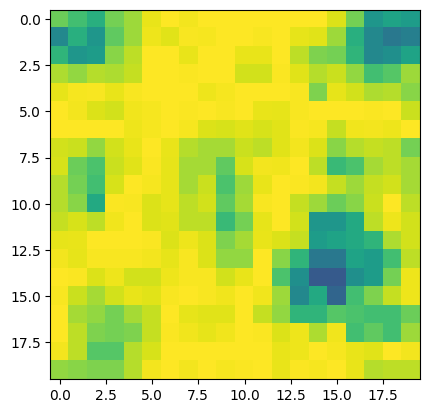

In [58]:
agents = agents_init(field, state)
res = population_opinion_timelapse(time, agents, construct)
#print(field_from_agents(res, psycho = True))